SVM Model Results
Accuracy: 0.9939
Precision: 0.9973
Recall: 0.9898
Area Under ROC Curve: 0.9937

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3655
           1       1.00      0.99      0.99      3342

    accuracy                           0.99      6997
   macro avg       0.99      0.99      0.99      6997
weighted avg       0.99      0.99      0.99      6997

Confusion Matrix:
--------------------------------------------------
True Negative (TN)  False Positive (FP) 
3646                9                   
False Negative (FN) True Positive (TP)  
34                  3308                


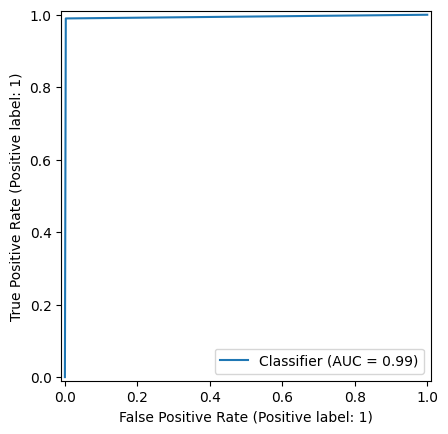

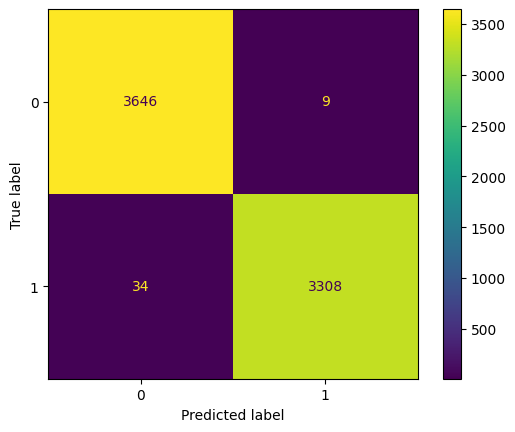

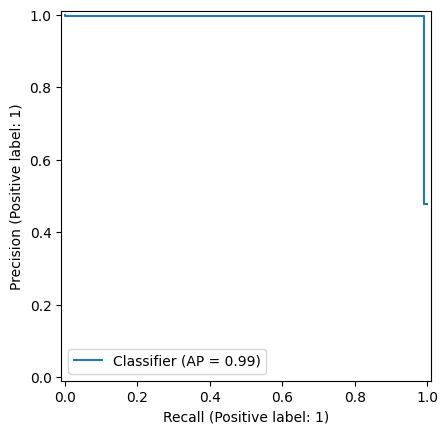

SVM model saved as 'svm_model.pkl'
Original Query:
SELECT * FROM users WHERE id = 1

Tokens:
['select', '*', 'from', 'users', 'where', 'id', '=', '1']

TF-IDF Features Used in This Query:
*                    : 0.3413
1                    : 0.2348
=                    : 0.2089
from                 : 0.3029
id                   : 0.5252
select               : 0.2381
users                : 0.5232
where                : 0.2945

Prediction:
Malicious
Original Query:
This is just a plain description of a product.

Tokens:
['this', 'is', 'just', 'a', 'plain', 'description', 'of', 'a', 'product.']

TF-IDF Features Used in This Query:
a                    : 0.6725
is                   : 0.5556
this                 : 0.4890

Prediction:
Safe
Original Query:
1' OR '1' = '1

Tokens:
['1', "'", 'or', "'", '1', "'", '=', "'", '1']

TF-IDF Features Used in This Query:
'                    : 0.7986
1                    : 0.5289
=                    : 0.1568
or                   : 0.2406

Prediction:


In [1]:
# Import necessary libraries
import joblib
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import sklearn.metrics as met
import matplotlib.pyplot as plt
import re

# Define the custom tokenizer function
def custom_tokenizer(text):
    # Space out special characters instead of removing
    text = re.sub(r"(['\";=])", r" \1 ", text)  
    text = re.sub(r"--", " -- ", text)          
    text = re.sub(r"\s+", " ", text)            
    text = text.lower()
    return text.strip().split()

# Load the preprocessed data and vectorizer
X_train_resampled = joblib.load('X_train_resampled.pkl')
y_train_resampled = joblib.load('y_train_resampled.pkl')
X_test_vect = joblib.load('X_test_vect.pkl')
y_test = joblib.load('y_test.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Initialize the SVM model with probability enabled (for future use)
svm_model = SVC(kernel='linear', cache_size=10000, probability=True)

import numpy as np

def inspect_query(query, vectorizer, model):
    print("=" * 60)
    print(f"Original Query:\n{query}")
    
    tokens = custom_tokenizer(query)
    print("\nTokens:")
    print(tokens)
    
    vectorized = vectorizer.transform([query])

    feature_names = vectorizer.get_feature_names_out()
    tfidf_vector = vectorized.toarray()[0]
    nonzero_indices = np.nonzero(tfidf_vector)[0]

    print("\nTF-IDF Features Used in This Query:")
    for idx in nonzero_indices:
        print(f"{feature_names[idx]:<20} : {tfidf_vector[idx]:.4f}")

    prediction = model.predict(vectorized)[0]
    print("\nPrediction:")
    print("Malicious" if prediction == 1 else "Safe")
    print("=" * 60)

def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
  
    #Train and evaluate the SVM model, printing evaluation metrics.

    print("SVM Model Results")
    print("=" * 50)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Area Under ROC Curve: {roc_auc:.4f}\n')

    # Classification report
    report = classification_report(y_test, y_pred, zero_division=0)
    print("Classification Report:")
    print("-" * 50)
    print(report)

    # Confusion matrix
    cm = met.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("-" * 50)
    print(f"{'True Negative (TN)':<20}{'False Positive (FP)':<20}")
    print(f"{cm[0][0]:<20}{cm[0][1]:<20}")
    print(f"{'False Negative (FN)':<20}{'True Positive (TP)':<20}")
    print(f"{cm[1][0]:<20}{cm[1][1]:<20}")

    # Plot metrics
    met.RocCurveDisplay.from_predictions(y_test, y_pred)
    met.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    met.PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return accuracy, report, cm

# Run training and evaluation
accuracy, report, cm = train_and_evaluate_svm(X_train_resampled, y_train_resampled, X_test_vect, y_test)

# Save the trained model
joblib.dump(svm_model, "svm_model.pkl")
print("SVM model saved as 'svm_model.pkl'")

inspect_query("SELECT * FROM users WHERE id = 1", vectorizer, svm_model)
inspect_query("This is just a plain description of a product.", vectorizer, svm_model)
inspect_query("1' OR '1' = '1", vectorizer, svm_model)



Label
0    12223
1    11099
Name: count, dtype: int64
Logistic Regression Model Resutls
Accuracy: 0.9917

Precision: 0.997

Recall: 0.9856

Area Under ROC Curve: 0.9915

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3655
           1       1.00      0.99      0.99      3342

    accuracy                           0.99      6997
   macro avg       0.99      0.99      0.99      6997
weighted avg       0.99      0.99      0.99      6997

Confusion Matrix:
--------------------------------------------------
True Negative (TN)  False Positive (FP) 
3645                10                  
False Negative (FN) True Positive (TP)  
48                  3294                


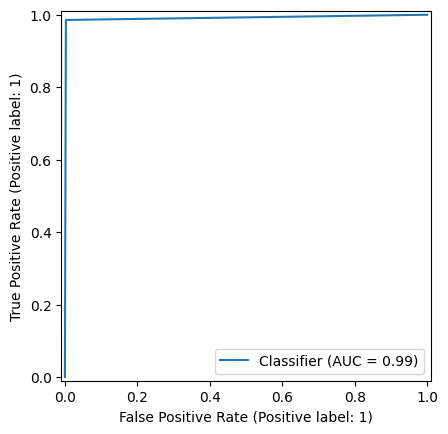

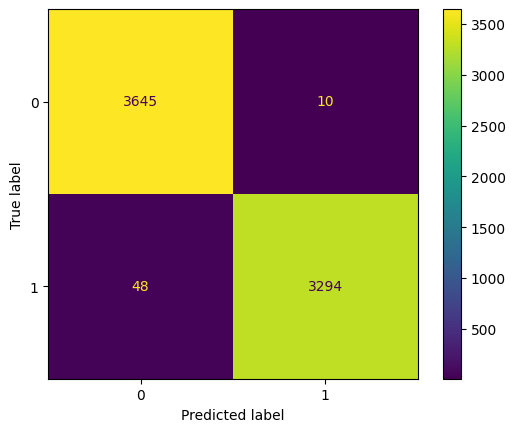

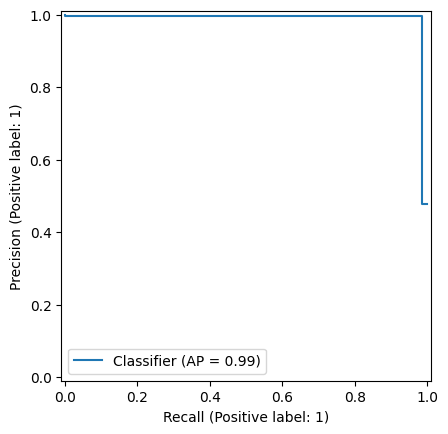

(0.9917107331713592,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      3655\n           1       1.00      0.99      0.99      3342\n\n    accuracy                           0.99      6997\n   macro avg       0.99      0.99      0.99      6997\nweighted avg       0.99      0.99      0.99      6997\n',
 array([[3645,   10],
        [  48, 3294]]))

In [2]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
import matplotlib.pyplot as plt

df = pd.read_csv('balanced.csv')
X = df['Sentence']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

log_model = LogisticRegression(solver='newton-cholesky')
print(df["Label"].value_counts())  

def train_and_evaluate_log(X_train, y_train, X_test, y_test):

    # Print the results
    print("Logistic Regression Model Resutls")
    print("="*50)

    # Train the Model
    log_model.fit(X_train, y_train)

    # Make Predicitons
    y_pred = log_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

    precision = met.precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4}\n')

    recall = met.recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4}\n')
    
    roc_auc = met.roc_auc_score(y_test, y_pred)
    print(f'Area Under ROC Curve: {roc_auc:.4}\n')

    report = met.classification_report(y_test, y_pred)
    print("Classification Report:")
    print("-"*50)
    print(report)

    cm = met.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("-"*50)
    print(f"{'True Negative (TN)':<20}{'False Positive (FP)':<20}")
    print(f"{cm[0][0]:<20}{cm[0][1]:<20}")
    print(f"{'False Negative (FN)':<20}{'True Positive (TP)':<20}")
    print(f"{cm[1][0]:<20}{cm[1][1]:<20}")

    # Plot the accuracy comparison
    met.RocCurveDisplay.from_predictions(y_test, y_pred)
    met.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    met.PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return accuracy, report, cm

# Run the function on resampled training data
train_and_evaluate_log(X_train_resampled, y_train_resampled, X_test_vect, y_test)

Random Forest Model Resutls
Train Accuracy: 0.9822595704948646
Accuracy: 0.9814

Train Precision: 0.9993956973652405
Precision: 0.9988

Recall: 0.9623

Area Under ROC Curve: 0.9806

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3655
           1       1.00      0.96      0.98      3342

    accuracy                           0.98      6997
   macro avg       0.98      0.98      0.98      6997
weighted avg       0.98      0.98      0.98      6997

Confusion Matrix:
--------------------------------------------------
True Negative (TN)  False Positive (FP) 
3651                4                   
False Negative (FN) True Positive (TP)  
126                 3216                


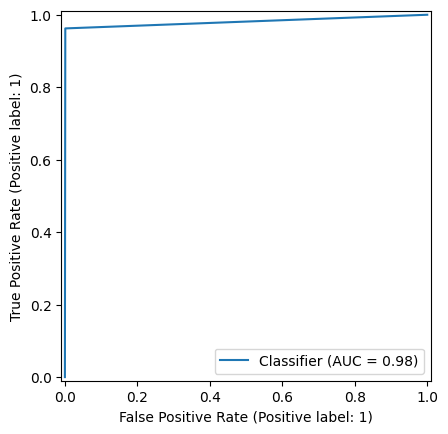

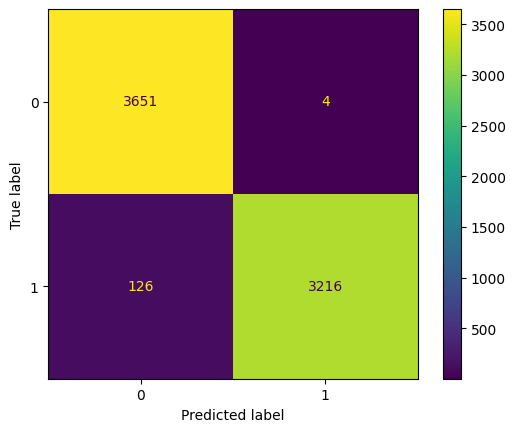

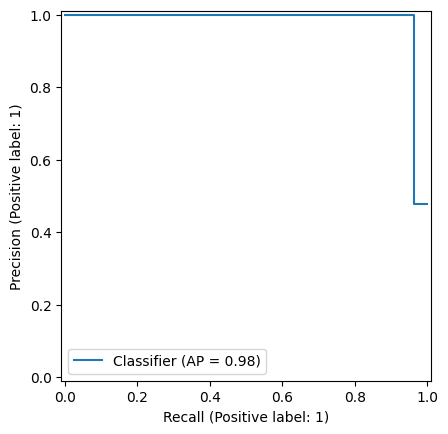

(0.9814206088323567,
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      3655\n           1       1.00      0.96      0.98      3342\n\n    accuracy                           0.98      6997\n   macro avg       0.98      0.98      0.98      6997\nweighted avg       0.98      0.98      0.98      6997\n',
 array([[3651,    4],
        [ 126, 3216]]))

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as met
import matplotlib.pyplot as plt


df = pd.read_csv('balanced.csv')
X = df['Sentence']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_model = RandomForestClassifier(max_depth=20)

def train_and_evaluate_rf(X_train, y_train, X_test, y_test):

    # Print the results
    print("Random Forest Model Resutls")
    print("="*50)

    #Train the model
    rf_model.fit(X_train, y_train)
    tpred = rf_model.predict(X_train)
    taccuracy = accuracy_score(y_train,tpred)
    print(f'Train Accuracy: {taccuracy}')
    y_pred = rf_model.predict(X_test)

    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

    tprecision = met.precision_score(y_train,tpred)
    print(f'Train Precision: {tprecision}')

    precision = met.precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4}\n')

    recall = met.recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4}\n')
    
    roc_auc = met.roc_auc_score(y_test, y_pred)
    print(f'Area Under ROC Curve: {roc_auc:.4}\n')

    report = met.classification_report(y_test, y_pred)
    print("Classification Report:")
    print("-"*50)
    print(report)

    cm = met.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("-"*50)
    print(f"{'True Negative (TN)':<20}{'False Positive (FP)':<20}")
    print(f"{cm[0][0]:<20}{cm[0][1]:<20}")
    print(f"{'False Negative (FN)':<20}{'True Positive (TP)':<20}")
    print(f"{cm[1][0]:<20}{cm[1][1]:<20}")

    # Plot the accuracy comparison
    met.RocCurveDisplay.from_predictions(y_test, y_pred)
    met.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    met.PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return accuracy, report, cm

# Run the function on resampled training data
train_and_evaluate_rf(X_train_resampled, y_train_resampled, X_test_vect, y_test)


Decision Tree Model Resutls
Accuracy: 0.9934

Precision: 0.9979

Recall: 0.9883

Area Under ROC Curve: 0.9932

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3655
           1       1.00      0.99      0.99      3342

    accuracy                           0.99      6997
   macro avg       0.99      0.99      0.99      6997
weighted avg       0.99      0.99      0.99      6997

Confusion Matrix:
--------------------------------------------------
True Negative (TN)  False Positive (FP) 
3648                7                   
False Negative (FN) True Positive (TP)  
39                  3303                


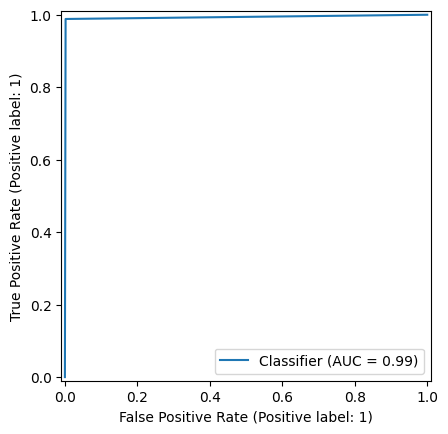

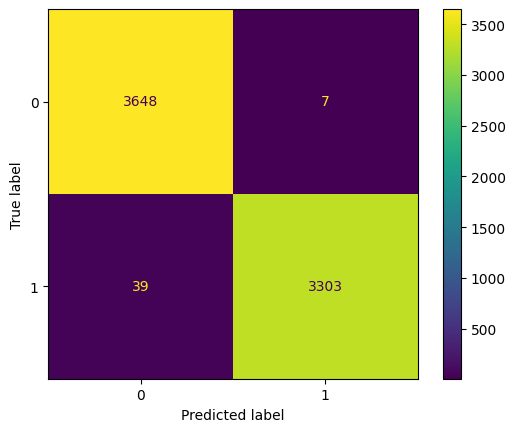

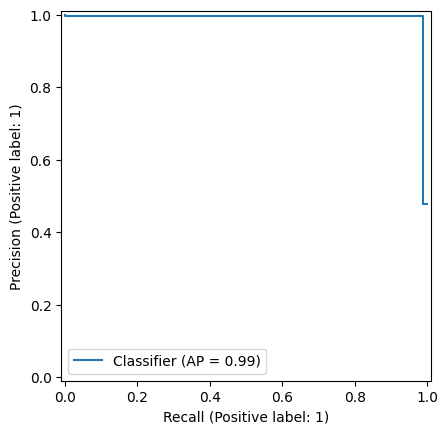

(0.9934257538945263,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      3655\n           1       1.00      0.99      0.99      3342\n\n    accuracy                           0.99      6997\n   macro avg       0.99      0.99      0.99      6997\nweighted avg       0.99      0.99      0.99      6997\n',
 array([[3648,    7],
        [  39, 3303]]))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import sklearn.metrics as met
import matplotlib.pyplot as plt

df = pd.read_csv('balanced.csv')
X = df['Sentence']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

dect_model = tree.DecisionTreeClassifier(max_depth=20)

def train_and_evaluate_dect(X_train, y_train, X_test, y_test):

    # Print the results
    print("Decision Tree Model Resutls")
    print("="*50)

    # Train Model
    dect_model.fit(X_train, y_train)

    # Make Predicitons
    y_pred = dect_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

    precision = met.precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4}\n')

    recall = met.recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4}\n')
    
    roc_auc = met.roc_auc_score(y_test, y_pred)
    print(f'Area Under ROC Curve: {roc_auc:.4}\n')

    report = met.classification_report(y_test, y_pred)
    print("Classification Report:")
    print("-"*50)
    print(report)

    cm = met.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("-"*50)
    print(f"{'True Negative (TN)':<20}{'False Positive (FP)':<20}")
    print(f"{cm[0][0]:<20}{cm[0][1]:<20}")
    print(f"{'False Negative (FN)':<20}{'True Positive (TP)':<20}")
    print(f"{cm[1][0]:<20}{cm[1][1]:<20}")

    # Plot the accuracy comparison
    met.RocCurveDisplay.from_predictions(y_test, y_pred)
    met.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    met.PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return accuracy, report, cm

# Run the function on resampled training data
train_and_evaluate_dect(X_train_resampled, y_train_resampled, X_test_vect, y_test)

Naive Bayes Model Results
Accuracy: 0.5908

Precision: 0.5391

Recall: 0.9871

Area Under ROC Curve: 0.6078

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.23      0.37      3655
           1       0.54      0.99      0.70      3342

    accuracy                           0.59      6997
   macro avg       0.75      0.61      0.53      6997
weighted avg       0.75      0.59      0.53      6997

Confusion Matrix:
--------------------------------------------------
True Negative (TN)  False Positive (FP) 
835                 2820                
False Negative (FN) True Positive (TP)  
43                  3299                


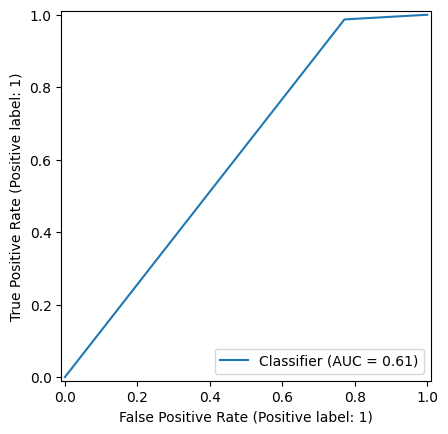

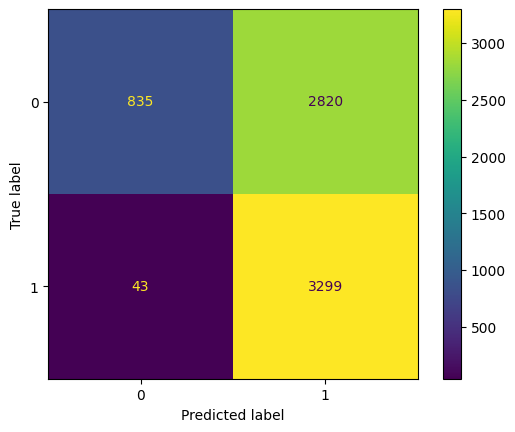

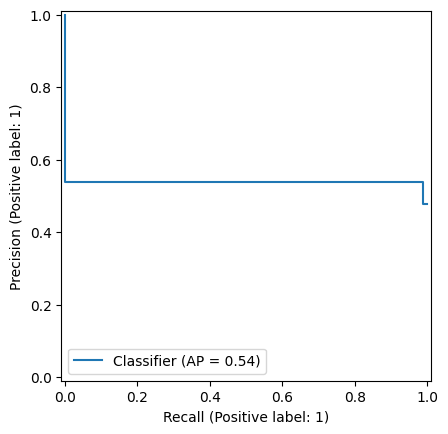

(0.5908246391310562,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.23      0.37      3655\n           1       0.54      0.99      0.70      3342\n\n    accuracy                           0.59      6997\n   macro avg       0.75      0.61      0.53      6997\nweighted avg       0.75      0.59      0.53      6997\n',
 array([[ 835, 2820],
        [  43, 3299]]))

In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
import matplotlib.pyplot as plt

# Convert sparse matrices to dense arrays
X_train_resampled_dense = X_train_resampled.toarray()  # Convert X_train_resampled to dense
X_test_vect_dense = X_test_vect.toarray()  # Convert X_test_vect to dense

# Load the dataset for training/testing
df = pd.read_csv('balanced.csv')
X = df['Sentence']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define the Naive Bayes model
nBay_model = GaussianNB()

def train_and_evaluate_nBay(X_train, y_train, X_test, y_test):

    # Print the results
    print("Naive Bayes Model Results")
    print("="*50)

    # Train Model
    nBay_model.fit(X_train, y_train)

    # Make Predicitons
    y_pred = nBay_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

    precision = met.precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4}\n')

    recall = met.recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4}\n')
    
    roc_auc = met.roc_auc_score(y_test, y_pred)
    print(f'Area Under ROC Curve: {roc_auc:.4}\n')

    report = met.classification_report(y_test, y_pred)
    print("Classification Report:")
    print("-"*50)
    print(report)

    cm = met.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("-"*50)
    print(f"{'True Negative (TN)':<20}{'False Positive (FP)':<20}")
    print(f"{cm[0][0]:<20}{cm[0][1]:<20}")
    print(f"{'False Negative (FN)':<20}{'True Positive (TP)':<20}")
    print(f"{cm[1][0]:<20}{cm[1][1]:<20}")

    # Plot the accuracy comparison
    met.RocCurveDisplay.from_predictions(y_test, y_pred)
    met.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    met.PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return accuracy, report, cm

# Run the function with the dense data
train_and_evaluate_nBay(X_train_resampled_dense, y_train_resampled, X_test_vect_dense, y_test)


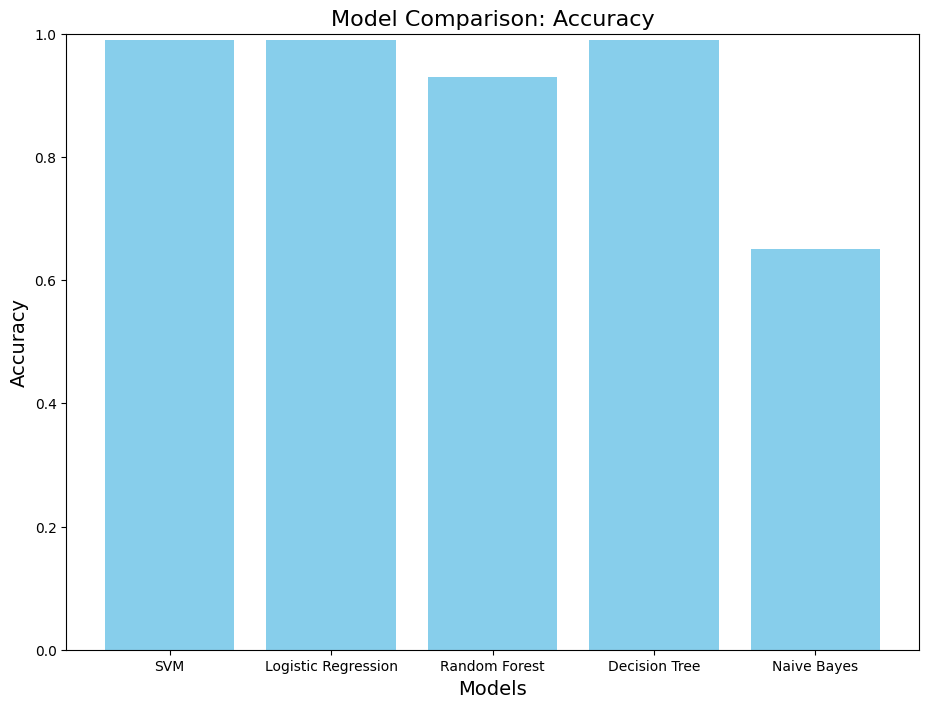

In [6]:
import matplotlib.pyplot as plt

# Store the accuracy results from different models
model_names = ['SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes']  # Example model names
accuracies = [ 0.99, 0.99, 0.93, 0.99, 0.65]  # Example accuracies for the models

# Plotting the accuracies
plt.figure(figsize=(11, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()